#**PROYECTO**

EVALUACIÓN DEL ESTADO DE SALUD DE UN BEBÉ DURANTE EL PARTO.

##**FASE 1: Carga de datos y análisis descriptivo.**

In [127]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [128]:
file = '/content/Sprint/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0


**Como análisis descriptivo se incluyen las tareas del sprint 1:**

###**1.Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúu.**

Las definiciones de cada tipo de variable:
- Cualitativas: Aquellas que representan cualidades o características categóricas, es decir no toman valores numéricos.
- Cuantitativas: Aquellas que cuantifican, es decir, toman valores numéricos:
 - Discretas: Tienen como resultado un numero contable de valores (Ej: Numero de hijos de una familia, numero de coches que tienes...)
 - Continuas: Pueden tomar cualquier valor dentro de un intervalo y suelen ser características medibles (Ej: Temperatura, altura de una persona...)

In [129]:
nombre_columnas      = data.columns.tolist()
significado_columnas = ['Identification','Start Instant','End Instant','Baseline Value','Accelerations','Foetal Movement','Uterine Contractions','Percentage of time with abnormal short term variability','Mean value of short term variability','Percentage of time with abnormal long term variability','Mean value of long term variability','Light Decelerations','Severe Decelerations','Prolongued Decelerations','Repetitive Decelerations',' Histogram Width','Low freq. of the histogram','High freq. of the histogram','Number of histogram peaks','Number of histogram zeros','Histogram Mode','Histogram Mean','Histogram Median','Histogram variance','Histogram tendency','Target']
columnas             = dict(zip(nombre_columnas, significado_columnas))

Antes de clasificar las variables se recopilan todas ellas y se les dota de una pequeña descripción:

In [130]:
columnas

{'AC': 'Accelerations',
 'ALTV': 'Percentage of time with abnormal long term variability',
 'ASTV': 'Percentage of time with abnormal short term variability',
 'DL': 'Light Decelerations',
 'DP': 'Prolongued Decelerations',
 'DR': 'Repetitive Decelerations',
 'DS': 'Severe Decelerations',
 'FM': 'Foetal Movement',
 'ID': 'Identification',
 'LBE': 'Baseline Value',
 'MLTV': 'Mean value of long term variability',
 'MSTV': 'Mean value of short term variability',
 'Max': 'High freq. of the histogram',
 'Mean': 'Histogram Mean',
 'Median': 'Histogram Median',
 'Min': 'Low freq. of the histogram',
 'Mode': 'Histogram Mode',
 'Nmax': 'Number of histogram peaks',
 'Nzeros': 'Number of histogram zeros',
 'Target': 'Target',
 'Tendency': 'Histogram tendency',
 'UC': 'Uterine Contractions',
 'Variance': 'Histogram variance',
 'Width': ' Histogram Width',
 'b': 'Start Instant',
 'e': 'End Instant'}

A partir del `data.info()` realizado al inicio, ya podemos concluir que todas las variables son cuantitativas, pues todas son de tipo numérico. Ahora, en base a la pequeña descripción de cada variable, y por ejemplo, el número de elementos únicos para cada una de ellas que se obtuvo al inicio, se van a clasificar las variables en continuas y discretas.
- Cuantitativa Continua = CC
- Cuantitativa Discreta = CD

In [131]:
tipo_variables = ['CD','CC','CC','CC','CD','CD','CD','CC','CC','CC','CC','CD','CD','CD','CD','CC','CC','CC','CD','CD','CC','CC','CC','CC','CD','CD']
tipo_variables = dict(zip(nombre_columnas,tipo_variables))

In [132]:
tipo_variables

{'AC': 'CD',
 'ALTV': 'CC',
 'ASTV': 'CC',
 'DL': 'CD',
 'DP': 'CD',
 'DR': 'CD',
 'DS': 'CD',
 'FM': 'CD',
 'ID': 'CD',
 'LBE': 'CC',
 'MLTV': 'CC',
 'MSTV': 'CC',
 'Max': 'CC',
 'Mean': 'CC',
 'Median': 'CC',
 'Min': 'CC',
 'Mode': 'CC',
 'Nmax': 'CD',
 'Nzeros': 'CD',
 'Target': 'CD',
 'Tendency': 'CD',
 'UC': 'CD',
 'Variance': 'CC',
 'Width': 'CC',
 'b': 'CC',
 'e': 'CC'}

###**2. ¿Cuál es la proporción de estados fetales normales?¿Y anormales?**

Mediante `matplotlib.pyplot.pie(x,..,labels=..,autopct=...)` se realiza un gráfico de tarta del vector x, en donde el área de cada porción viene dada por $x/sum(x)$. Con "labels" proporcionamos las etiquetas para cada porción y con autopct habilitamos que en cada una de ellas aparezca su porcentaje con respecto al gráfico.  
Como lista x pasamos aquella que contiene el total de estados normales y anormales como sus dos elementos.

0    1655
1     471
Name: Target, dtype: int64


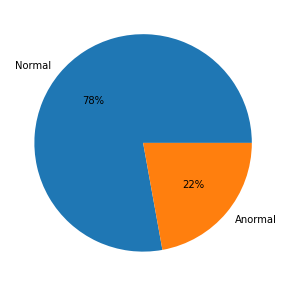

In [133]:
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

###**3. Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.**

Se va a emplear `pandas.Dataframe.describe()` que genera una serie de estadisticas descriptivas, incluyendo medidas de centralización como la media y la mediana ($=P_{50}$), de localización como los percentiles 25, 50 y 75, y de dispersión como la desviación estándar, el máximo y el mínimo. Recoge prácticamente todas las estadísticas descriptivas fundamentales. 

In [134]:
FM_statistics     = data.FM.describe().T
ALTV_statistics   = data.ALTV.describe().T
Median_statistics = data.Median.describe().T

In [135]:
FM_statistics

count    2126.000000
mean        7.241298
std        37.125309
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       564.000000
Name: FM, dtype: float64

Llama la atención la gran dispersión en los datos, con una valor muy grande para la desviación estándar ($\approx 5·\mu$), y un gran tamaño de rango ($max-min$), lo que junto a los percentiles, nos habla de la presencia datos extremos, pues el 75% de los datos tienen un valor inferior a 2. Es una característica de gran variabilidad. 

In [136]:
ALTV_statistics

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

Para ALTV se tiene un comportamiento similar aunque con una menor dispersión.

In [137]:
Median_statistics

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

Para "Median" el comportamiento es radicalmente opuesto a los dos casos anteriores presentando el conjunto una localización mucho mayor. De hecho, empleando como criterio para determinar los valores atípicos que lo son aquellos que no están en el intervalo $[Q_{1}-1.5RIQ, Q_{3}+1.5RIQ]$, incluso el máximo y mínimo, aún siendo atípicos, están bastante próximos a este intervalo.

###**4. Obtenga el histograma para las variables: LBE, DS y Min.**



Mediante el histograma se puede ver como se distribuye la población en función de una característica, en este caso LBE, DS y Min.

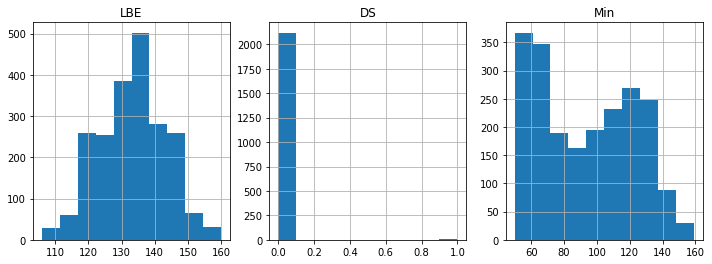

In [138]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)
data['LBE'].hist(ax=axs[0]).set_title('LBE')
data['DS'].hist(ax=axs[1]).set_title('DS')
data['Min'].hist(ax=axs[2]).set_title('Min')
plt.show()

Podemos extraer conclusiones interesantes a partir de estos histogramas:
- LBE: Es la característica con una distribución más uniforme, que incluso podría modelizarse como una gaussiana.
- DS: Es una variable dicotómica, que solo toma dos valores, y uno de ellos con muchisima más frecuencia que el otro. Va a aportar muy poca información a nuestro conjunto.
- Min: Una variable con una distribución más compleja que las dos anteriores.

###**5. Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean.** 

Mediante `pandas.Dataframe.boxplot` se construye una gráfica de caja (boxplot) para las variables AC, ASTV Y Mean. El gráfico de cajas permite representar gráficamente los datos a través de sus cuartiles. La caja se extiende desde el primer al tercer cuartil y la línea que lo cruza se corresponde con el segundo cuartil o mediana.
También muestra los datos atípicos, es decir, áquellos que están fuera del intervalo representado por las líneas que salen de la caja y de valor:

\begin{align}
[Q_{1}-1.5·RIQ, &Q_{3}+1.5·RIQ];\\
RIQ = &Q_{3}-Q_{1}
\end{align}

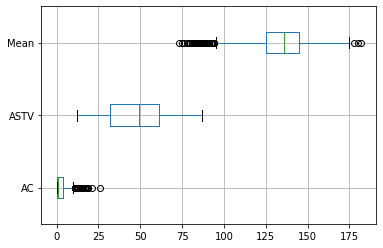

In [139]:
data.boxplot(column=['AC','ASTV','Mean'],vert=False)

Es llamativa la presencia de una gran cantidad de valores atípicos en Mean y AC, y de ninguno en ASTV. La variable AC parece ser una importante variable explicativa, pues el grueso de sus valores (interior de la caja) está poco disperso, sin embargo, presenta una importante cantidad de valores atípicos, que probablemente estén relacionados con el estado anormal del feto (menos frecuente). Así, cabe esperar que se trate de una variable que varíe fuertemente según cual sea el target. 

##**FASE 2: Muestreo. Conjunto de entrenamiento y test**

###**1. Enumere las 3 variables explicativas que presentan mayor correlación con el target.**

Para ello vamos a emplear la función de pandas `DataFrame.corr()`, que devuelve una matriz de correlación de Pearson. Cada elemento [i,j] de esta matriz contiene la correlación lineal de Pearson entre la variable i y la j. 
En primer lugar, antes de responder a la cuestión se puede visualizar esta matriz por medio de un mapa de calor.

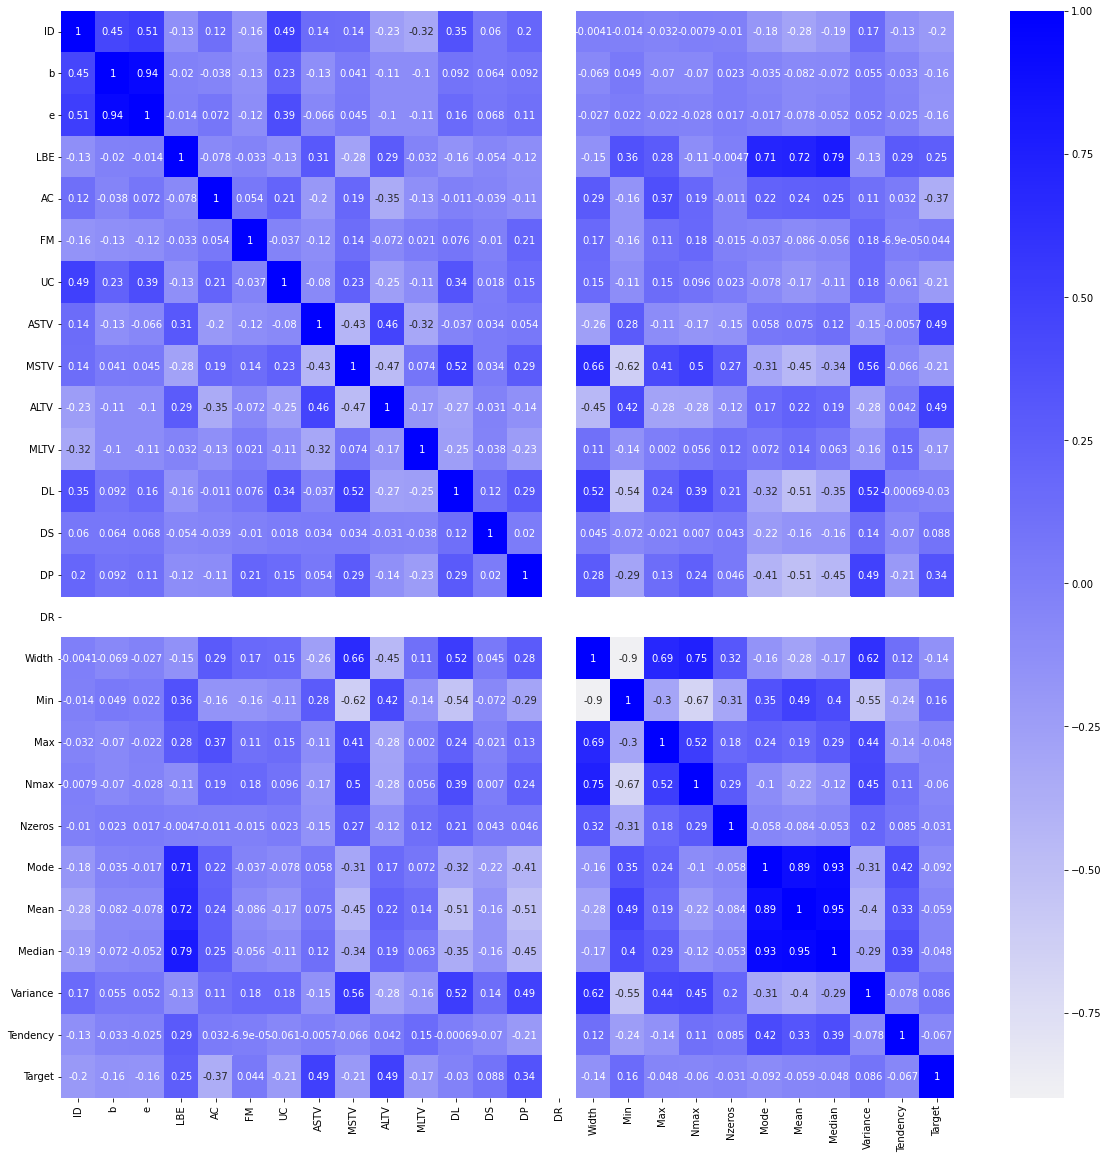

In [140]:
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Puesto que vamos a analizar las variables que presentan una mayor correlación con el Target, nos basta coger la última fila o columna de la matriz, pues como se puede ver en el mapa, es la que contiene la correlación del Target con todas las demás variables.

`data.corr()` devuelve la matriz de correlación como un dataframe, con lo que basta con seleccionar la columna del Target. Posteriormente, se calcula el valor absoluto de las correlaciones, para no despreciar las correlaciones negativas a la hora de calcular las máximas mediante `dataFrame.nlargest()` 

In [141]:
corr = data.corr()
corr_target = corr['Target']
corr_target = np.sqrt(corr['Target']**2)
print('El valor absoluto de las correlaciones:\n', corr_target)

El valor absoluto de las correlaciones:
 ID          0.203026
b           0.156009
e           0.159325
LBE         0.251875
AC          0.369470
FM          0.043953
UC          0.213611
ASTV        0.493391
MSTV        0.207717
ALTV        0.489400
MLTV        0.172519
DL          0.029696
DS          0.087967
DP          0.340647
DR               NaN
Width       0.142182
Min         0.158171
Max         0.048106
Nmax        0.060354
Nzeros      0.031163
Mode        0.092320
Mean        0.059107
Median      0.047890
Variance    0.085948
Tendency    0.066529
Target      1.000000
Name: Target, dtype: float64


Se utiliza n=4, pues la máximo correlación va a ser la del target consigo mismo, que luego se descartará para quedarse con las tres siguientes.

In [142]:
maximos = corr_target.nlargest(n=4)
maximos =[maximos.index[1],maximos.index[2],maximos.index[3]]
print('Las tres variables que presentan una mayor correlación con el target son:', maximos)

Las tres variables que presentan una mayor correlación con el target son: ['ASTV', 'ALTV', 'AC']


###**2. Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.**

Previamente a realizar la partición del dataset en un conjunto de entrenamiento y otro de test, se eliminan una serie de variables, pues como se vió en clase no aportan información relevante:
- ID: No es más que el identificador de cada prueba.
- b y e: Son el instante de inicio y final de la prueba, lo que no es relevante para su resultado final.
- DR: Únicamente toma un valor, por lo que no tiene capacidad para influir en el resultado.

In [143]:
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


Se realiza la partición:

In [144]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

##**FASE 3: Ajuste del algoritmo de Naive Bayes.**

###**1. A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.**

Se ajusta a un modelo a partir del algoritmo de Naive Bayes, concretamente a `GaussianNB()`, el usado preferentemente cuando las variables explicativas son de tipo continuo, y que asigna a la distribución de probabilidad de cada variable explicativa condicionada por el target una distribución gaussiana:

\begin{align}
P(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)
\end{align}

Por tanto, esta se suma a la previa y mas fuerte suposición "Naive" de independencia entre las variables explicativas.

¿Por qué escoger `GaussianNB()`? 
- Como se dijo, se usa para variables explicativas de tipo continua. En este caso, hay más continuas que discretas, aunque la diferencia es pequeña. También es importante el hecho de que las dos que presentan una mayor correlación con el target también lo son.





In [145]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train) 
y_pred_test = modelNB.predict_proba(X_test)

###**2. Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.**

La curva ROC es una métrica de validación empleada en algoritmos de clasificación binaria (En este caso, enfermo o sano). En ella se representa la sensibilidad frente a uno menos la especifidad.

\begin{align}
S = \frac{VP}{VP+FN}=TPR\\
1-E=1-\frac{VN}{VN+FP}=1-TNR&=FPR
\end{align}

La función `sklearn.metrics.roc_curve` computa TPR y FPR, empleando diferentes umbrales para determinar si el resultado es positivo o negativo y a partir de ellos se representa la curva ROC. Es decir, exige una mayor o menor "seguridad" para caracterizar la variable objetivo como positiva. Por ejemplo, se puede exigir que el valor estimado sea superior a 0.9, lo que se traduce en un alto número de verdaderos negativos pero también en la pérdida de verdaderos positivos, con el consecuente aumento de falsos negativos, y por tanto una baja sensibilidad y alta especificidad. Por otro lado, exigiendo un valor superior a 0.1, se tendría una alta sensibilidad y una baja especificidad. 

Así, computando TPR y FPR para diferentes umbrales entre 0 y 1 se construye la curva ROC, que por lo dicho debe comenzar en (0,0) a la izquierda y acabar en (1,1) a la derecha, y que idealmente tendría la siguiente forma:

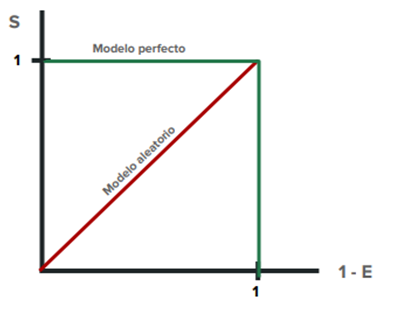

En este caso el área bajo la curva es obviamente 1. Cuanto más se acerque a este valor el área bajo la curva, mejor será el modelo, de ahí que hablemos de la curva ROC como métrica. Este área se calcula por medio de la función `sklearn.metrics.auc`

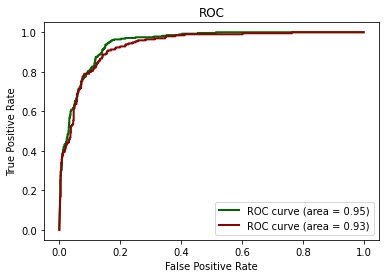

In [146]:
from sklearn.metrics import roc_curve,auc

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=2,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=2,label="ROC curve (area = %0.2f)" % roc_auc_test,)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

El modelo tiene un desempeño bastante bueno, pues el área está próxima a uno, y no hay "overfitting", pues las áreas son muy similares para el conjunto de test y entrenamiento.

###**3. Adicional: Ajuste al algoritmo Naive Bayes Multinomial**

Cómo se sugirió para el proyecto final, se prueba con un ajuste Naive Bayes alternativo, en este caso con el multinomial. Este algoritmo hace uso de variables discretas, por lo que es necesario discretizar o categorizar las variables continuas, para luego asociarles una distribución multinomial. En primer lugar, se genera una copia del dataframe sobre la que se va a trabajar.  

In [147]:
data_copy = data.copy()
data_copy.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


A continuación, los datos de cada variable se van a agrupar en función de su valor. Para ello se crea el código de abajo. 

En este caso, los datos de cada columna se van agrupar en quintiles, y a cada quintil se le va a asociar un valor. Es decir, si el valor está dentro del 20% más pequeño se le asocia el 0, entre el 20 y el 40% el 1 y así sucesivamente. Sería análogo a una clasificación del tipo:
*   Muy pequeño: 0
*   Pequeño: 1
*   Neutro: 2
*   Grande: 3
*   Muy grande: 4

Se pueden hacer más grupos de clasificación sin más que cambiar los parámetros del bucle, pero no se observó una mejora significativa. 

In [148]:
lista = data_copy.columns.to_list()
lista.remove('Target')
for i in lista:
    data_copy.loc[data_copy[i]<=data_copy[i].quantile(0.2),f"{i}_cat"]=0
    for j in range(1,5):
      data_copy.loc[data_copy[i]>data_copy[i].quantile(0.2*j),f"{i}_cat"]=j
    data_copy = data_copy.drop([i],axis=1)


Así queda el nuevo conjunto de datos sobre el que aplicar el algoritmo:

In [149]:
data_copy.head()

,Target,LBE_cat,AC_cat,FM_cat,UC_cat,ASTV_cat,MSTV_cat,ALTV_cat,MLTV_cat,DL_cat,DS_cat,DP_cat,Width_cat,Min_cat,Max_cat,Nmax_cat,Nzeros_cat,Mode_cat,Mean_cat,Median_cat,Variance_cat,Tendency_cat
0,1,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,4.0,3.0
1,0,2.0,3.0,0.0,2.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,4.0,1.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,0.0
2,0,2.0,2.0,0.0,3.0,0.0,4.0,0.0,4.0,3.0,0.0,0.0,4.0,1.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,0.0
3,0,2.0,2.0,0.0,3.0,0.0,4.0,0.0,4.0,3.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,2.0,2.0,2.0,3.0,3.0
4,0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,2.0,2.0,2.0,2.0,3.0


Se entrena el modelo con estos nuevos datos, obteniendo lo siguiente:

In [150]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

X_mnb = data_copy.loc[:, data.columns != "Target"]
y_mnb = data_copy.loc[:, data.columns == "Target"]
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_mnb, y_mnb, test_size = 0.40, random_state = 0)

modelNB_multi = mnb.fit(X_train_mnb, y_train_mnb.values.ravel())
y_pred_train_mnb = modelNB_multi.predict_proba(X_train_mnb) 
y_pred_test_mnb = modelNB_multi.predict_proba(X_test_mnb)

In [151]:
fpr_train_mnb, tpr_train_mnb, _ = roc_curve(y_train, y_pred_train_mnb[:, 1])
print ('El area bajo la curva es de: ',auc(fpr_train_mnb, tpr_train_mnb))

El area bajo la curva es de:  0.43780011895953924


El rendimiento de este modelo es del todo insatisfactorio. Cabría esperarlo, pues al discretizar las variables se está simplificando y reduciendo la información que contienen, lo que penaliza el entrenamiento del algoritmo. El empleo de este algoritmo se hace desde un punto visto puramente académico, pues en este contexto práctico no tiene demasiado sentido.  

###**4. Adicional: Ajuste a Naive Bayes empleando PCA** 

Otra sugerencia fue la de emplear análisis de componentes principales antes de aplicar el algoritmo Naive Bayes. A pesar de que esta técnica se aprenderá en módulos posteriores, puede servir como una primera aproximación a la misma, además de llevar consigo una propiedad de gran interés práctico y que merece la pena por lo menos estudiar.  

PCA o análisis de componentes principales, es una técnica empleada generalmente para reducir la dimensionalidad del conjunto de datos en caso de que incluya muchas características, fundamentalmente por motivos de rendimiento computacional. Este no es nuestro caso, pues no se dispone de un dataset con una cantidad de dimensiones especialmente grande. Sin embargo, PCA presenta una propiedad que si es de interés y que se verá a continuación.

En PCA se realiza una proyección de los datos. Si pensamos en dos dimensiones, estos datos se proyectan sobre el eje que preserva una mayor cantidad de varianza en los mismos, es decir, aquel que contiene una mayor información sobre los datos, y por lo que se lo denomina componente principal. A continuación se escoge un segundo eje ortogonal al primero, y que preserve la mayor cantidad posible de la varianza restante. Las variables anteriores se proyectan sobre cada uno de estos ejes, dando luegar a nuevas variables. 

Generalizando a más dimensiones, se escogerían tantos ejes como dimensiones se tuviesen. Lo importante para nosotros en este punto, es que la elección de ejes ortogonales se traduce en una correlación casi inexistente entre las nuevas variables. Esto es de vital importancia en Naive Bayes, en dónde se supone la independecia de todas las variables (suposición Naive)  

En primer lugar, se generan las "nuevas" variables a partir de PCA.

In [152]:
from sklearn.decomposition import PCA
pca = PCA()
reduced_data_train = pca.fit_transform(X_train)
reduced_data_test  = pca.fit_transform(X_test)

Se puede echar un vistazo a la varianza de cada uno de los componentes seleccionados, y se puede ver como se podrían reducir varias dimensiones sin miedo a perder apenas varianza.

In [153]:
print(pca.explained_variance_)

[3.09457082e+03 1.53139464e+03 8.34639834e+02 4.47522210e+02
 3.48054423e+02 1.77880480e+02 1.45569639e+02 3.29989872e+01
 2.78482111e+01 1.92902739e+01 7.72359398e+00 6.13480261e+00
 4.60866155e+00 3.42659528e+00 2.20186960e+00 4.78704080e-01
 3.07645947e-01 1.31534565e-01 8.73923584e-02 2.17171268e-03
 1.80828744e-28]


Se entrena y evalúa el modelo Naive Bayes gaussiano con las "nuevas variables"

In [154]:
modelNB_PCA = gnb.fit(reduced_data_train,y_train.values.ravel())

y_pred_train_PCA = modelNB_PCA.predict_proba(reduced_data_train) 
y_pred_test_PCA = modelNB_PCA.predict_proba(reduced_data_test)

fpr_train_PCA, tpr_train_PCA, _ = roc_curve(y_train, y_pred_train_PCA[:, 1])
print('El área bajo la curva en el conjunto de entrenamiento:',auc(fpr_train_PCA, tpr_train_PCA))

fpr_test_PCA, tpr_test_PCA, _ = roc_curve(y_test, y_pred_test_PCA[:, 1])
print('El área bajo la curva en el conjunto de test:',auc(fpr_test_PCA, tpr_test_PCA))

El área bajo la curva en el conjunto de entrenamiento: 0.8930379655017336
El área bajo la curva en el conjunto de test: 0.8258051907442152


El rendimiento es peor que empleando las "viejas" variables. Sin embargo, a pesar de la reducción en la correlación esto era esperable, pues al proyectar los datos se está perdiendo información sobre los mismos.

De todos modos, los resultados son bastante satisfactorios y sirven para poner de manifiesto la potencia de PCA, en casos de reducción de dimensionalidad o aplicando Naive Bayes a conjuntos de datos para los que exista una alta correlación entre sus características.

De cara a usos futuros, habría que prestar atención también al sobreajuste que aperece.

##**FASE 4: Ajuste del Algoritmo de Support Vector Machine**

###**1. A partir del conjunto de entrenamiento y test creados en el segundo sprint, ajuste un modelo utilizando el algoritmo SVM dejando los valores por defecto.**

Al dejar los valores por defecto, lo fudamental es que el parámetro regularizador es C=1 y el kernel empleado será el gaussiano. Únicamente se emplea `probability=True`.

Es decir, se tiene un clasificador no lineal y con un margen bastante suave.

In [155]:
from sklearn.svm import SVC
#Se dejan los valores por defecto, únicamente se introduce probability.
svm = SVC(probability=True)
svm.fit(X_train,y_train.values.ravel())

SVC(probability=True)

###**2. Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.**

Ya se describió en el apartado anterior cómo se contruye la curva ROC a partir del ratio de falsos y verdaderos positivos, así como la interpretación del área bajo la curva. Se hace por tanto para el conjunto de entrenamiento y de test con los resultados que proporciona el algoritmo SVM. 

In [156]:
y_train_svm = svm.predict_proba(X_train)
y_test_svm = svm.predict_proba(X_test)

fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_train_svm[:,1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_test_svm[:,1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

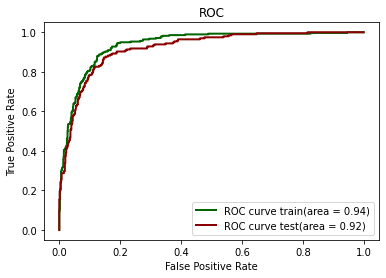

In [157]:
plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=2,label="ROC curve train(area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=2,label="ROC curve test(area = %0.2f)" % roc_auc_test_svm,)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

El desempeño del modelo es bastante bueno, especialmente teniendo en cuenta el uso de valores por defecto, con áreas próximas a 1, y sin un sobreajuste considerable.

###**3. Compare en la misma gráfica, la curva ROC y el AUC para el conjunto de test clasificado con Naive Bayes y con SVM.** 

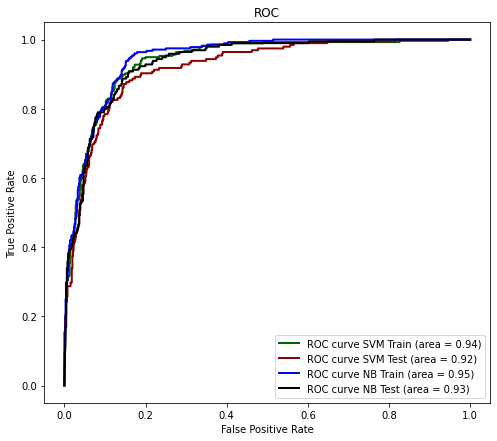

In [158]:
fig = plt.figure(figsize=(8,7))
plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=2,label="ROC curve SVM Train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=2,label="ROC curve SVM Test (area = %0.2f)" % roc_auc_test_svm,)
plt.plot(fpr_train,tpr_train,color="blue",lw=2,label="ROC curve NB Train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="black",lw=2,label="ROC curve NB Test (area = %0.2f)" % roc_auc_test,)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Se obtienen resultados ligeramente mejores para el ajuste Naive Bayes que para SVM, sin observar un sobreajuste relevante en ningún caso.

##**FASE ADICIONAL: Búsqueda de la mejor combinación de hiperparámetros en el algoritmo de SVM utilizando la función Grid Search de Scikit Learn.** 

La función Grid Search permite probar el modelo de forma automática con la lista de parámetros que le pasemos, además de devolver diversas métricas para cada una de las combinaciones posibles de los parámetros. En primer lugar, se definen los parámetros que va a recorrer la función "Grid Search". Se va a probar con mayor y menor margen, grado de polinomio o coeficiente del RBF. 

In [159]:
C  = np.linspace(0.1,1,19)
C2 = np.linspace(2,10,9)
C  = np.append(C,C2)
gamma = np.linspace(1e-3,1e-4,5)
degree=[2,3,4,5]

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"kernel": ["rbf"], "gamma": gamma, "C": C},
    {"kernel": ["linear"], "C": C},
    {"kernel": ["poly"], "C": C, "degree": degree},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

grid.fit(X = X_train, y = y_train.values.ravel())

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
158,1.0,NaN,linear,NaN,0.961140,0.009888,0.971758,0.004486
149,0.55,NaN,linear,NaN,0.961053,0.010824,0.971486,0.004836
144,0.3,NaN,linear,NaN,0.961043,0.010171,0.970934,0.005613
157,0.95,NaN,linear,NaN,0.961021,0.010295,0.971791,0.004512
138,10.0,0.000325,rbf,NaN,0.961010,0.006096,0.993353,0.000467
146,0.4,NaN,linear,NaN,0.960977,0.010412,0.971255,0.005124
143,0.25,NaN,linear,NaN,0.960934,0.009959,0.970643,0.005892
147,0.45,NaN,linear,NaN,0.960934,0.010413,0.971242,0.005115
151,0.65,NaN,linear,NaN,0.960890,0.010629,0.971617,0.004611
148,0.5,NaN,linear,NaN,0.960879,0.010492,0.971342,0.005007


La mejor opción es un kernel lineal y el parámetro C igual a 1. De la tabla anterior es interesante el quinto caso, donde se tiene un sobreajuste muy evidente, pues se emplea C=10, lo que da al algoritmo muy poco margen para clasificar erroneamente alguno de los datos del conjunto de entrenamiento.  

##**FASE 5: Validación del algoritmo escogido a partir de la curva ROC, el área bajo la curva, la matriz de confusión y la precisión. Evaluar si existe sobreajuste.**

Se escoge como algoritmo el obtenido mediante la función Grid Search, que se supone el de mejor desempeño, y se evalúan las diferentes métricas que se proponen.

* Comenzando por la curva ROC y el área bajo la misma, se compara también con los resultados del algoritmo Naive Bayes gaussiano:




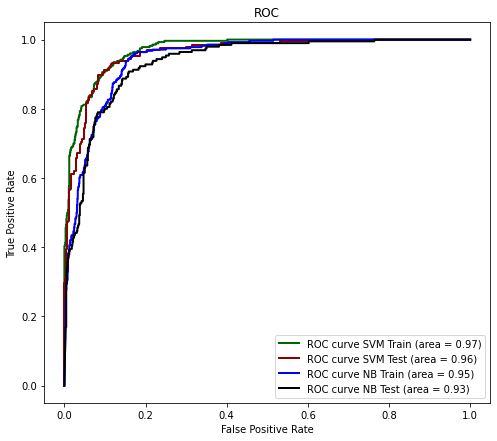

In [161]:
svm_lineal = SVC(C = 1,kernel='linear',probability=True)
svm_lineal.fit(X_train,y_train.values.ravel())

y_train_svm_lineal = svm_lineal.predict_proba(X_train)
y_test_svm_lineal = svm_lineal.predict_proba(X_test)

fpr_train_svm_lineal, tpr_train_svm_lineal, _ = roc_curve(y_train, y_train_svm_lineal[:,1])
roc_auc_train_svm_lineal = auc(fpr_train_svm_lineal, tpr_train_svm_lineal)

fpr_test_svm_lineal, tpr_test_svm_lineal, _ = roc_curve(y_test, y_test_svm_lineal[:,1])
roc_auc_test_svm_lineal = auc(fpr_test_svm_lineal, tpr_test_svm_lineal)

fig = plt.figure(figsize=(8,7))
plt.plot(fpr_train_svm_lineal,tpr_train_svm_lineal,color="darkgreen",lw=2,label="ROC curve SVM Train (area = %0.2f)" % roc_auc_train_svm_lineal,)
plt.plot(fpr_test_svm_lineal,tpr_test_svm_lineal,color="darkred",lw=2,label="ROC curve SVM Test (area = %0.2f)" % roc_auc_test_svm_lineal,)
plt.plot(fpr_train,tpr_train,color="blue",lw=2,label="ROC curve NB Train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="black",lw=2,label="ROC curve NB Test (area = %0.2f)" % roc_auc_test,)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

El desempeño para el SVM con kernel lineal y C=1 es mejor que para el algoritmo Naive Bayes que empleamos previamente.

*   A continuación se analiza la matriz de confusión:

In [162]:
y_test_svm_lineal = svm_lineal.predict(X_test)

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svm_lineal)

array([[625,  31],
       [ 56, 139]])

Por tanto, se tienen 625 verdaderos sanos, y 31 falsos sanos, por 56 falsos problemáticos y 139 verdaderos problemáticos.

Por tanto, se trata de una prueba con una mayor sensibilidad que especificidad, lo que siempre es recomendable en estas pruebas de tipo diagnóstico dónde no queremos que se nos "pase" ningún enfermo.

Por último, se analiza la precisión, que se podría obtener directamente de la matriz de confusión:

In [164]:
precision = svm_lineal.score(X_test,y_test)
print('La precisión es de:', precision)

La precisión es de: 0.8977673325499412


En definitiva, se obtiene una gran precisión.